# CS 533 Project: TVCA - Traffic volumes correlation with bike traffic
by Abishai Joy and Ravishankar

## Purpose and Context
The purpose of this notebook is to determine if bike lane infrastructure predicts bike traffic

## Setup

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simpledbf import Dbf5 

import glob

import datetime
import calendar

## Load Data

In [101]:
path = 'clean-data/*.csv'
for fname in glob.glob(path):
    print(fname)

clean-data/bike-count-2019-may.csv
clean-data/bike-count-2018-may.csv
clean-data/bike-count-2014-sept.csv
clean-data/bike-count-2013-may.csv
clean-data/bike-count-2012-sept.csv
clean-data/bike-count-2013-sept.csv
clean-data/bike-count-2012-may.csv
clean-data/bike-count-overall.csv
clean-data/bike-count-2011.csv
clean-data/bike-count-2010.csv
clean-data/bike-count-2016-may.csv
clean-data/bike-count-2014-may.csv
clean-data/bike-count-2015-may.csv
clean-data/bike-count-2010-2019.csv


In [102]:
bike_count_overall = pd.read_csv('clean-data/bike-count-overall.csv')
bike_count_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,Year Counts
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.0,1
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6,5
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28.0,1
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62.0,1
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137.0,1


We're interested in the top 10 streets with counts between 2010 and 2019

In [109]:
top10_overall = bike_count_overall[bike_count_overall['Year Counts'] >= 6]
top10_overall

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,Year Counts
6,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.250000,8
11,08th / Greenbelt,270.0,346.0,0.0,315.0,200.0,250.0,178.0,281.0,0.0,0.0,1840,262.857143,7
13,08th / River,252.0,249.0,115.0,146.0,123.0,295.0,177.0,302.0,0.0,0.0,1659,207.375000,8
18,13th / Fort,105.0,0.0,0.0,129.0,80.0,126.0,64.0,102.0,0.0,0.0,792,99.000000,6
57,Broadway / Warm Springs,0.0,58.0,0.0,64.0,47.0,73.0,65.0,62.0,0.0,0.0,567,70.875000,6
59,Chinden / Garrett,0.0,61.0,78.0,25.0,47.0,36.0,76.0,0.0,0.0,0.0,323,53.833333,6
62,Collister / Catalpa,43.0,59.0,56.0,0.0,0.0,43.0,51.0,49.0,0.0,0.0,351,43.875000,6
67,Emerald / Americana / Latah,130.0,0.0,155.0,0.0,116.0,129.0,134.0,182.0,0.0,0.0,846,141.000000,6
76,Five Mile / McMillan,52.0,76.0,55.0,0.0,0.0,66.0,49.0,57.0,0.0,0.0,437,54.625000,6
86,Hill / Castle,0.0,0.0,53.0,0.0,33.0,38.0,20.0,27.0,34.0,0.0,205,34.166667,6


In [112]:
# Drop 2015 and 2019 due to no data
# Drop Total Average & Year Counts because they are not meaningful
top10_overall = top10_overall.drop(columns=['2015-May','2019-May','Total','Average','Year Counts'])
top10_overall

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September
6,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0
11,08th / Greenbelt,270.0,346.0,0.0,315.0,200.0,250.0,178.0,281.0
13,08th / River,252.0,249.0,115.0,146.0,123.0,295.0,177.0,302.0
18,13th / Fort,105.0,0.0,0.0,129.0,80.0,126.0,64.0,102.0
57,Broadway / Warm Springs,0.0,58.0,0.0,64.0,47.0,73.0,65.0,62.0
59,Chinden / Garrett,0.0,61.0,78.0,25.0,47.0,36.0,76.0,0.0
62,Collister / Catalpa,43.0,59.0,56.0,0.0,0.0,43.0,51.0,49.0
67,Emerald / Americana / Latah,130.0,0.0,155.0,0.0,116.0,129.0,134.0,182.0
76,Five Mile / McMillan,52.0,76.0,55.0,0.0,0.0,66.0,49.0,57.0
86,Hill / Castle,0.0,0.0,53.0,0.0,33.0,38.0,20.0,27.0


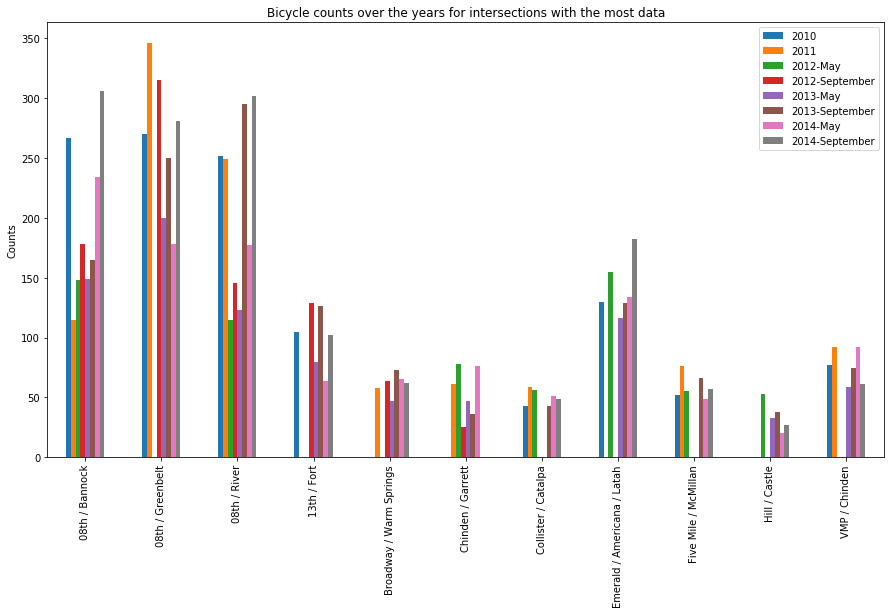

In [135]:
g = top10_overall.plot.bar(figsize=(15,8))
g.set_xticklabels(top10_overall['Location'])
g.set_ylabel('Counts')
g.set_title('Bicycle counts over the years for intersections with the most data')
# fig = g.get_figure()
# fig.savefig("output.png")

In [111]:
top10_overall['Location']

6                   08th / Bannock
11                08th / Greenbelt
13                    08th / River
18                     13th / Fort
57         Broadway / Warm Springs
59               Chinden / Garrett
62             Collister / Catalpa
67     Emerald / Americana / Latah
76            Five Mile / McMillan
86                   Hill / Castle
130                  VMP / Chinden
Name: Location, dtype: object

Load the concatenated csv

In [104]:
bike_count_2010_2019 = pd.read_csv('clean-data/bike-count-2010-2019.csv')
bike_count_2010_2019.head()

,Location,Date,Time,Total
0,08th / Bannock,2010-09-16,AM,131.0
1,08th / Bannock,2010-09-14,PM,267.0
2,08th / Fort,2010-09-15,PM,132.0
3,08th / Greenbelt,2010-09-14,PM,270.0
4,08th / River,2010-09-15,AM,114.0


Filter out the streets that we're looking for

In [105]:
top10 = bike_count_2010_2019[bike_count_2010_2019['Location'].isin(['08th / Bannock', 
                                                                   '08th / Greenbelt', 
                                                                   '08th / River', 
                                                                   '13th / Fort',
                                                                   'Broadway / Warm Springs',
                                                                   'Chinden / Garrett',
                                                                   'Collister / Catalpa',
                                                                   'Emerald / Americana / Latah',
                                                                   'Five Mile / McMillan',
                                                                   'Hill / Castle',
                                                                   'VMP / Chinden']) ]
top10.head()

,Location,Date,Time,Total
0,08th / Bannock,2010-09-16,AM,131.0
1,08th / Bannock,2010-09-14,PM,267.0
3,08th / Greenbelt,2010-09-14,PM,270.0
4,08th / River,2010-09-15,AM,114.0
5,08th / River,2010-09-15,PM,252.0


Convert Date to datetime64 type so we cn extract month and year from it

In [106]:
top10['Date'] = pd.to_datetime(top10['Date'])
print (top10['Date'].dtype)

datetime64[ns]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
top10['Year'] = top10['Date'].dt.year
top10['Month'] = top10['Date'].dt.month

# Convert month into to month name
top10['Month'] = top10['Month'].apply(lambda x: calendar.month_abbr[x])
top10.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,Location,Date,Time,Total,Year,Month
0,08th / Bannock,2010-09-16,AM,131.0,2010,Sep
1,08th / Bannock,2010-09-14,PM,267.0,2010,Sep
3,08th / Greenbelt,2010-09-14,PM,270.0,2010,Sep
4,08th / River,2010-09-15,AM,114.0,2010,Sep
5,08th / River,2010-09-15,PM,252.0,2010,Sep


In [108]:
top10[top10['Location'] == "08th / Bannock"]


,Location,Date,Time,Total,Year,Month
0,08th / Bannock,2010-09-16,AM,131.0,2010,Sep
1,08th / Bannock,2010-09-14,PM,267.0,2010,Sep
29,08th / Bannock,2011-09-15,AM,115.0,2011,Sep
47,08th / Bannock,2012-05-16,AM,148.0,2012,May
82,08th / Bannock,2012-09-11,AM,178.0,2012,Sep
83,08th / Bannock,2012-09-12,AM,132.0,2012,Sep
84,08th / Bannock,2012-09-18,NOON,61.0,2012,Sep
139,08th / Bannock,2013-05-09,AM,149.0,2013,May
202,08th / Bannock,2013-09-10,AM,165.0,2013,Sep
203,08th / Bannock,2013-09-11,AM,149.0,2013,Sep
